In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Importing the necessary libraries
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random


# Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

: 

: 

In [ ]:
words = []
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('/content/drive/MyDrive/INTENTS.json').read()

In [ ]:
intents = json.loads(data_file)

In [ ]:
# Convert intents data to a Pandas DataFrame for EDA
intents_df = pd.json_normalize(intents['intents'])
intents_df.drop(columns='patterns', inplace=True)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Word frequency analysis
words = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        words.extend(nltk.word_tokenize(pattern))

word_freq = nltk.FreqDist(words)

In [ ]:
# Print top 10 most common words
print(word_freq.most_common(10))

[('the', 102), ('I', 63), ('to', 52), ('a', 49), ('How', 38), ('can', 36), ('in', 36), ('of', 33), ('is', 29), ('child', 29)]


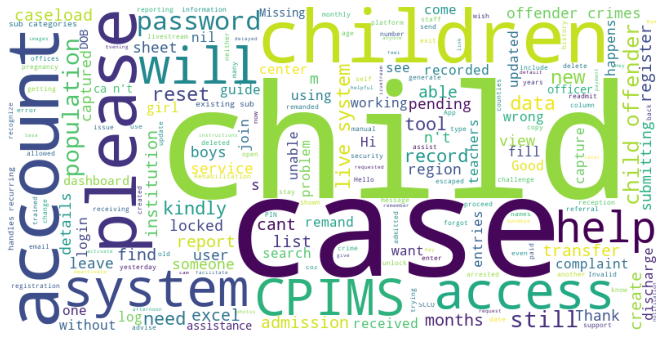

In [ ]:
# Visualize word frequency using a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

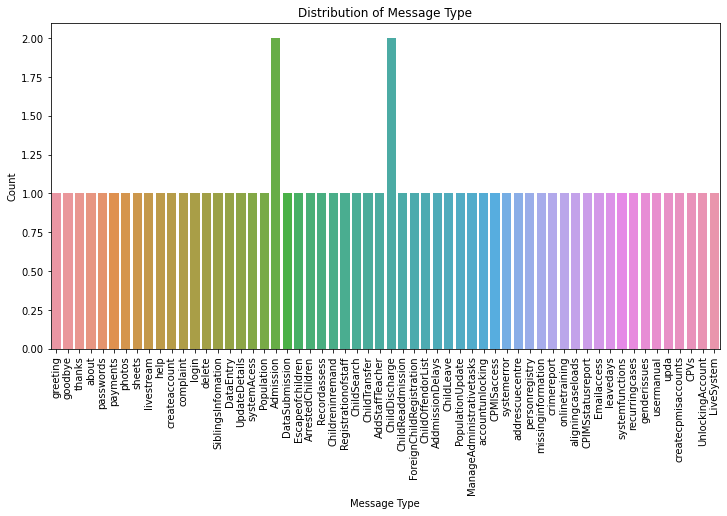

In [ ]:
# Statistical visualization to examine distribution of message type
plt.figure(figsize=(12, 6))
sns.countplot(data=intents_df, x='tag')
plt.xticks(rotation=90)
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Message Type')
plt.show()

In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        # tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

In [ ]:
# sort classes
classes = sorted(list(set(classes)))

In [ ]:
# documents = combination between patterns and intents
print(len(documents), "documents")

217 documents


In [ ]:
# classes = intents
print(len(classes), "classes", classes)

58 classes ['AddStaffTeacher', 'AddmissionDelays', 'Admission', 'ArrestedChildren', 'CPIMSstatusreport', 'CPMISaccess', 'CPVs', 'ChildDischarge', 'ChildLeave', 'ChildOffendorList', 'ChildReaddmission', 'ChildSearch', 'ChildTransfer', 'Childreninremand', 'DataEntry', 'DataSubmission', 'Emailaccess', 'Escapeofchildren', 'ForeignChildRegistration', 'LiveSystem', 'ManageAdministrativetasks', 'Population', 'PopulationUpdate', 'Recordassess', 'Registrationofstaff', 'SiblingsInfomation', 'UnlockingAccount', 'UpdateDetails', 'about', 'accountunlocking', 'addrescuecentre', 'aligningcaseloads', 'complaint', 'createaccount', 'createcpmisaccounts', 'crimereport', 'delete', 'genderissues', 'goodbye', 'greeting', 'help', 'leavedays', 'livestream', 'login', 'missinginformation', 'onlinetraining', 'passwords', 'payments', 'personregistry', 'photos', 'recurringcases', 'sheets', 'systemAcess', 'systemerror', 'systemfunctions', 'thanks', 'upda', 'usermanual']


In [ ]:
# words = all words, vocabulary
print(len(words), "unique lemmatized words", words)

504 unique lemmatized words ["'m", "'s", "'undefined", "'ve", '(', ')', ',', '-1', '.', '..', '....', '0/0', '10', '11', '1234', '18', '2016', '2017', '41', '503', ':', ';', 'a', 'able', 'about', 'absence', 'accepting', 'access', 'account', 'activate', 'active', 'add', 'admission', 'admit', 'admitted', 'advice', 'advise', 'after', 'afternoon', 'age', 'aged', 'agency', 'alert', 'all', 'allowed', 'already', 'also', 'am', 'an', 'and', 'annually', 'anonymous', 'another', 'any', 'anyone', 'app', 'appropriate', 'are', 'arrested', 'asking', 'assist', 'assistance', 'assistant', 'at', 'attached', 'audio', 'avoid', 'back', 'background', 'backlog', 'base', 'be', 'because', 'been', 'being', 'between', 'both', 'boy', 'but', 'by', 'bye', 'ca', 'cadre', 'cam', 'can', 'cant', 'capture', 'captured', 'case', 'caseload', 'caseloads', 'category', 'center', 'certificate', 'challenge', 'change', 'charge', 'check', 'child', 'clear', 'code', 'column', 'come', 'committed', 'complaint', 'computer', 'concerned',

In [ ]:
pickle.dump(words, open('texts.pkl', 'wb'))
pickle.dump(classes, open('labels.pkl', 'wb'))

In [ ]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence

In [ ]:
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [ ]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

<ipython-input-106-175f8a2b5529>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [ ]:
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")

Training data created


In [ ]:
# Split data into training and validation sets
split = int(0.8 * len(train_x))
train_x, val_x = train_x[:split], train_x[split:]
train_y, val_y = train_y[:split], train_y[split:]

In [ ]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [ ]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), validation_data=(np.array(val_x), np.array(val_y)), epochs=200, batch_size=5, verbose=1)
with open('model.h5', 'wb') as file:
    pickle.dump(hist.history, file)
print("model created")

Epoch 1/200
35/35 [==============================] - 1s 13ms/step - loss: 4.0630 - accuracy: 0.0347 - val_loss: 4.0313 - val_accuracy: 0.0682
Epoch 2/200
35/35 [==============================] - 0s 6ms/step - loss: 3.9538 - accuracy: 0.0636 - val_loss: 4.0263 - val_accuracy: 0.0455
Epoch 3/200
35/35 [==============================] - 0s 4ms/step - loss: 3.8530 - accuracy: 0.0751 - val_loss: 4.0482 - val_accuracy: 0.0455
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 3.7833 - accuracy: 0.0751 - val_loss: 4.0139 - val_accuracy: 0.0682
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 3.5979 - accuracy: 0.1156 - val_loss: 4.0214 - val_accuracy: 0.0909
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 3.5501 - accuracy: 0.1503 - val_loss: 4.0252 - val_accuracy: 0.0682
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 3.4129 - accuracy: 0.1561 - val_loss: 4.0134 - val_accuracy: 0.0682
Epoch 8/200


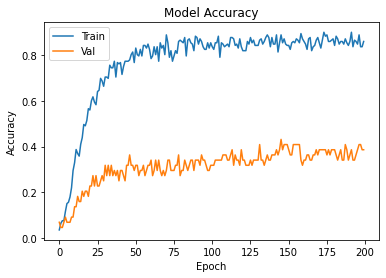

In [ ]:
# plot training and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

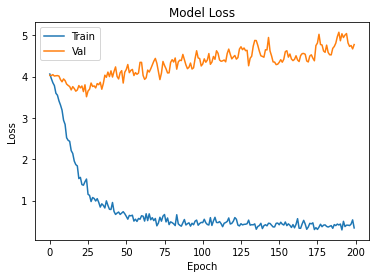

In [ ]:
# plot training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [125]:
from sklearn.metrics import classification_report

# Generate predictions for the validation set
val_predictions = model.predict(val_x)

# Convert predictions from one-hot encoding to class labels
val_preds_labels = [classes[np.argmax(pred)] for pred in val_predictions]

# Convert validation set from one-hot encoding to class labels
val_labels = [classes[np.argmax(label)] for label in val_y]

# Generate classification report
print(classification_report(val_labels, val_preds_labels, labels=classes))

2/2 [==============================] - 0s 5ms/step
                           precision    recall  f1-score   support

          AddStaffTeacher       0.00      0.00      0.00         0
         AddmissionDelays       0.00      0.00      0.00         0
                Admission       0.00      0.00      0.00         2
         ArrestedChildren       0.00      0.00      0.00         1
        CPIMSstatusreport       0.00      0.00      0.00         0
              CPMISaccess       0.00      0.00      0.00         1
                     CPVs       0.00      0.00      0.00         0
           ChildDischarge       0.00      0.00      0.00         1
               ChildLeave       0.00      0.00      0.00         0
        ChildOffendorList       0.00      0.00      0.00         0
        ChildReaddmission       0.00      0.00      0.00         0
              ChildSearch       0.00      0.00      0.00         3
            ChildTransfer       1.00      0.67      0.80         3
         C

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
!pip install flask-ngrok
!pip install flask-bootstrap

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template , request 
from flask_bootstrap import Bootstrap


In [ ]:
app = Flask(__name__)
app._static_folder = '/content/static'
bootstrap = Bootstrap(app)
run_with_ngrok(app)

@app.route("/")
def home():
    return render_template("index.html")
app.run()